## Introduction

In this project, I will analyze batting performance data from the ICC Men’s T20 Cricket World Cup 2024. The dataset contains key metrics such as runs scored, innings played, batting averages, strike rates, hundreds scored, and the teams represented by each player. My primary objective is to compare the performance of batters and identify standout players in two categories: consistency, based on batting averages, and explosiveness, measured by strike rates. 

Additionally, I will consider the challenging batting conditions in New York and the Caribbean, which resulted in lower overall runs compared to previous World Cups. This context is crucial for a deeper understanding of the statistics and performance evaluations as I explore who truly emerged as the best batters in the tournament. By analyzing both consistency and explosiveness, I aim to highlight the players who excelled in both areas and stood out as top performers.



In [2]:
import pandas as pd


# Adjust the file path to where the dataset is stored
file_path = '/Users/devamin/Desktop/t20-world-cup/batting_stats_for_icc_mens_t20_world_cup_2024.csv'

df = pd.read_csv(file_path)

# Display the first few rows to confirm it's loaded correctly
print(df.head())

         Player                      Team  Mat  Inns  NO  Runs   HS   Ave  \
0    NP Kenjige  United States of America    4     2   0     1    1   0.5   
1   Aaron Jones  United States of America    6     6   2   162  94*  40.5   
2  Aasif Sheikh                     Nepal    3     3   0    63   42  21.0   
3  Abbas Afridi                  Pakistan    1     1   0    17   17  17.0   
4     F Achelam                    Uganda    1     1   0     9    9   9.0   

       SR  100  50  0  
0   25.00    0   0  1  
1  135.00    0   1  1  
2   88.73    0   0  0  
3   80.95    0   0  0  
4   69.23    0   0  0  


In [3]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

df.fillna(0,inplace=True)

df_filtered = df[df['Runs'] >= 100]

print(df_filtered)

Missing values:
 Player    0
Team      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
SR        0
100       0
50        0
0         0
dtype: int64
                    Player                      Team  Mat  Inns  NO  Runs  \
1              Aaron Jones  United States of America    6     6   2   162   
20      Azmatullah Omarzai               Afghanistan    8     8   0   111   
21              Babar Azam                  Pakistan    4     4   1   122   
22             JM Bairstow                   England    8     6   2   110   
26           RD Berrington                  Scotland    4     3   2   102   
34                HC Brook                   England    8     4   2   145   
36              JC Buttler                   England    8     7   2   214   
39               J Charles               West Indies    6     6   0   140   
47               Q de Kock              South Africa    9     9   0   243   
55                  S Dube                     India    

## Pre-processing

To ensure data accuracy and consistency, I preprocessed the dataset by filling all missing or blank values with 0. Additionally, I filtered the data to include only batters who scored at least 100 runs throughout the tournament. This threshold helps eliminate skewed results caused by small sample sizes, as a single exceptional or poor inning could disproportionately impact the analysis. By setting 100 runs as a minimum benchmark, the focus remains on players who actively participated in the majority of the tournament, allowing for more reliable and meaningful comparisons



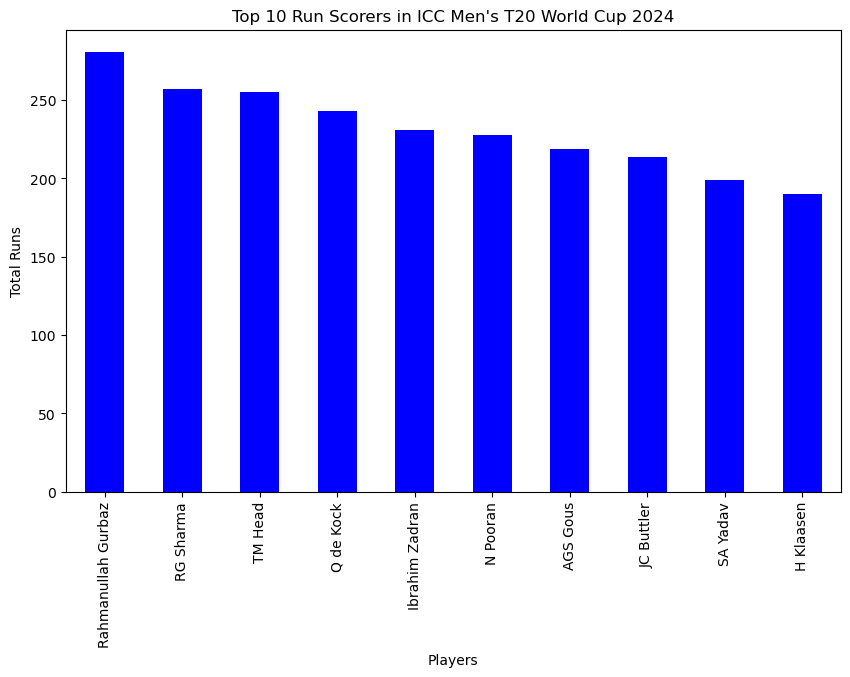

In [5]:
import matplotlib.pyplot as plt

top_run_scorers = df_filtered.groupby('Player')['Runs'].sum().nlargest(10)

plt.figure(figsize=(10,6))
top_run_scorers.plot(kind='bar',color='blue')
plt.title('Top 10 Run Scorers in ICC Men\'s T20 World Cup 2024')
plt.xlabel('Players')
plt.ylabel('Total Runs')
plt.show()

# Top 10 Run Scorers

This visualization highlights the top 10 run scorers of the ICC Men's T20 World Cup, drawing attention to the stellar performances that shaped the tournament. Notably, players from associate nations like Rahmanullah Gurbaz of Afghanistan and AGS Gous of the USA stand out. Their critical roles in unexpected victories, such as Afghanistan's triumph over Australia and the USA's shocking defeat of Pakistan, underscore the unpredictability of the tournament.

The X-axis lists the players, while the Y-axis represents total runs scored. The dominance of openers in this chart is significant, as they have the greatest opportunity to build big innings by facing more deliveries compared to middle-order players. Openers often set the tone for the match, and their ability to capitalize on early overs is reflected in their high run tallies. This insight emphasizes the importance of early partnerships and the role openers play in shaping a team's success in T20 cricket. 


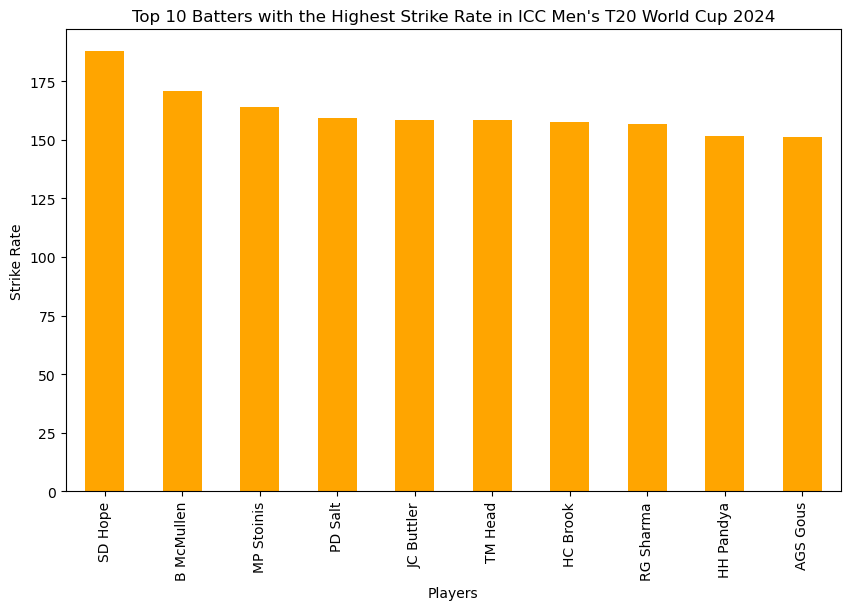

In [7]:
top_strike_rate_batters = df_filtered.groupby('Player')['SR'].max().nlargest(10)

plt.figure(figsize=(10,6))
top_strike_rate_batters.plot(kind='bar', color='orange')
plt.title('Top 10 Batters with the Highest Strike Rate in ICC Men\'s T20 World Cup 2024')
plt.xlabel('Players')
plt.ylabel('Strike Rate')
plt.show()

## Highest Strike Rate

This visualization showcases the top 10 most explosive batters in the ICC Men’s T20 Cricket World Cup 2024, 
focusing on those who scored at least 100 runs throughout the tournament. Strike rate, a critical measure 
in T20 cricket, reflects how quickly a batter scores runs, often making the difference between a competitive total 
and a game-winning one. Strike rate is calculated by how many runs a batter would score in a 100 balls. 
In this analysis, I aim to identify the players who consistently pushed the scoring rate, 
even under pressure.

By setting the 100-run threshold, we ensure that only batters with significant contributions are considered, 
avoiding any outliers from small sample performances. The players highlighted in this chart are those who delivered 
high-impact innings and demonstrated the ability to accelerate their team’s score when needed most. 
These explosive batters likely shifted the momentum of matches and became key figures in their teams’ success.

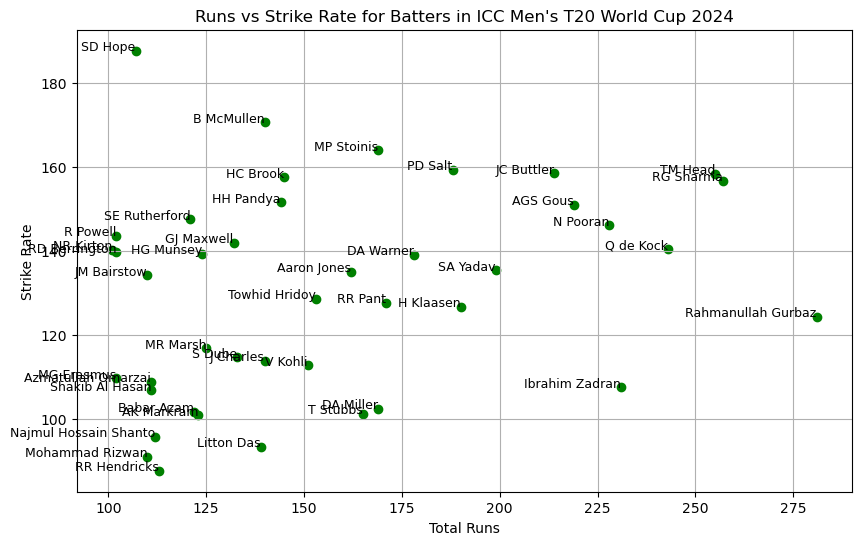

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df_filtered['Runs'], df_filtered['SR'], color='green')

for i in range(len(df_filtered)):
    plt.text(df_filtered['Runs'].iloc[i], df_filtered['SR'].iloc[i], df_filtered['Player'].iloc[i], fontsize=9, ha='right')
plt.title('Runs vs Strike Rate for Batters in ICC Men\'s T20 World Cup 2024')
plt.xlabel('Total Runs')
plt.ylabel('Strike Rate')
plt.grid(True)
plt.show()

## Runs vs Strike Rate

In T20 cricket, the ability to score runs quickly is essential, as each team has just 20 overs (120 balls) to post a competitive total. The best batters combine high run totals with a rapid strike rate, making them indispensable to their team’s success. This visualization highlights that balance, showcasing which players excelled at both accumulating runs and maintaining a high strike rate during the ICC Men’s T20 Cricket World Cup 2024.

Among the standout performers are Rohit Sharma of India and Travis Head, whose performances placed them head and shoulders above the rest. Rohit Sharma, in particular, played a pivotal role as captain in leading India to World Cup victory. Not only was he one of the tournament’s top run-scorers, but his explosive strike rate added immense value to the team's overall performance. His leadership on and off the field, coupled with his ability to accelerate the game, proved instrumental in India’s journey to the title.

This visualization emphasizes how key Sharma's contributions were, not just as a batter, but as a captain who led by example, ensuring that India maintained momentum and dominance throughout the tournament.

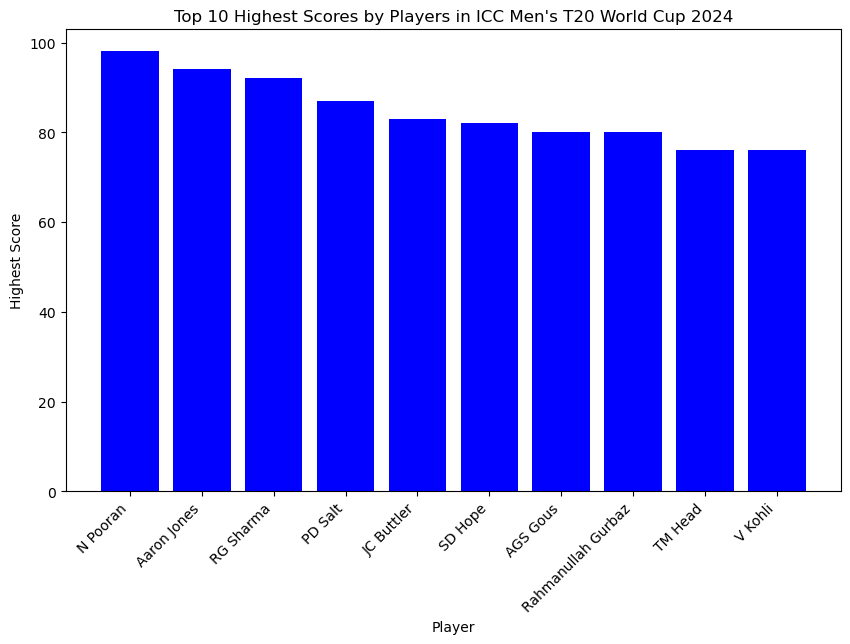

In [11]:
df_filtered = df_filtered.copy()
df_filtered.loc[:, 'HS_numeric'] = df_filtered['HS'].apply(lambda x: int(x.replace('*', '')) if isinstance(x, str) else x)
top_10_high_scores = df_filtered.sort_values(by='HS_numeric', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top_10_high_scores['Player'], top_10_high_scores['HS_numeric'], color='blue')

plt.title('Top 10 Highest Scores by Players in ICC Men\'s T20 World Cup 2024')
plt.xlabel('Player')
plt.ylabel('Highest Score')
plt.xticks(rotation=45,  ha='right')

plt.show()

## Top 10 Highest Scores

This visualization highlights the top 10 highest individual scores in a single innings during the ICC Men’s T20 Cricket World Cup 2024. These standout performances often proved decisive, showcasing how a single, extraordinary innings can shape the outcome of not just a match, but the entire tournament.

A prime example is Rohit Sharma's remarkable knock of 92 against Australia in the Super 8s stage. His innings was a turning point in the World Cup, as it played a pivotal role in knocking out one of India’s fiercest competitors and securing India’s place in the Semi-Finals. This display of composure and skill under pressure is a testament to how crucial individual performances can be in a high-stakes tournament like the T20 World Cup.

These top 10 scores reflect the moments when batters seized control of the game, altering the course of the competition and leaving a lasting impact on their team's journey through the tournament. 
